**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df1= pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df1.shape

(310, 7)

In [5]:
df1.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [7]:
df1.groupby("class").count() #the class labels are unequally distributed, which would bias the model to be built.

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [8]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [9]:
df1.corr()
#sacral slope and lumbar lordosis are highly correlated with the pelvic incidence.
#So one of these features might have to be dropped

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [10]:
#sns.pairplot(df1,diag_kind='kde',hue='class')

# Encode the Class variable to integer.

In [11]:
df1['class']=df1['class'].astype("category").cat.codes
df1["class"].unique()

array([0, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [12]:
df1_feat=df1.drop(labels="class",axis=1)
# The lumbar Lordosis feature is arbitrarily dropped due to its correlation with the pelvic incidence.
df1_feat=df1_feat.drop(labels="lumbar_lordosis_angle",axis=1)
df1_labels=df1["class"]
X= np.array(df1_feat)
y= np.array(df1_labels)

# Normalize your Data (X) to get values between 0 to 1.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
X
#Normalisation done before splitting data into training and test sets, therefore, there is dataleak. 

array([[0.35568788, 0.51989984, 0.2508573 , 0.30746116, 0.02514839],
       [0.12450104, 0.2967831 , 0.14462935, 0.47664891, 0.03636497],
       [0.41166648, 0.51393229, 0.30766054, 0.38609692, 0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.23490726, 0.59779618, 0.01943732],
       [0.18425678, 0.27235174, 0.21462279, 0.52117504, 0.02624045],
       [0.07420202, 0.20770855, 0.14251659, 0.57924032, 0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=2)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [15]:
from sklearn.metrics import accuracy_score
values=list(range(1,30))
Finalscore=[]
k_neighbours=[]
for k in values:
    if k%2!=0:
        NNH = KNeighborsClassifier(n_neighbors= k,weights='uniform',metric='euclidean')
        NNH.fit(X_train, y_train)
        y_pred=NNH.predict(X_test)
        accscore=accuracy_score(y_test,y_pred)
        Finalscore.append(accscore)
        k_neighbours.append(k)
        
            
        
MSE = [1 - x for x in Finalscore]
data={"K_number":k_neighbours,"Misclass_error":MSE}  
noir=pd.DataFrame(data)
noir.Misclass_error.min()

print ("The optimal k number and its Misclassifiaction error is-\n", noir.loc[noir["Misclass_error"]==noir.Misclass_error.min()])


        
    
    

The optimal k number and its Misclassifiaction error is-
    K_number  Misclass_error
7        15        0.182796


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

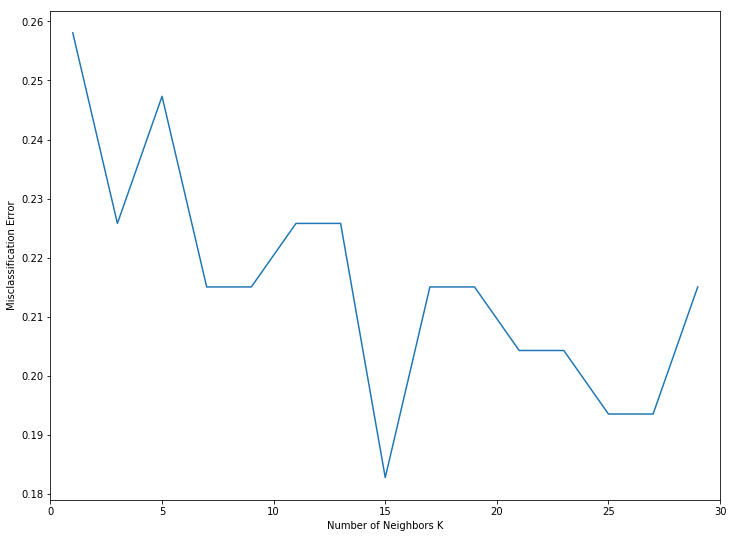

In [16]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(0,30)
plt.plot(k_neighbours,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [17]:
#  As observed from the graph above, the optimal K number is 15 (in the range from 1 to 29).
#  This cannot be considered as the absolute optimal K neighbour for various reasons.
# These reasons are -
#  1.strong correlations between the independant variables-  different value/values would have been obtained if other 
#  strongly correlated variables would have been dropped. Perhaps the best method would have to be to combine the correlated variables into a single feature.   
#  2.Dataleak from the standardisation before the train, test split.
#  3.Assigning different random state numbers to the train,test, split function would produce different optimal K numbers in this case.
# Therefore, after proper EDA, feature engineering and feature selection, the optimal K neighbour should be found and cross validation should be done.

In [18]:
from sklearn.metrics import confusion_matrix
NNH = KNeighborsClassifier(n_neighbors= 15,weights='uniform',metric='euclidean')
NNH.fit(X_train, y_train)
y_pred=NNH.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

0.8172043010752689
[[61  7]
 [10 15]]


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [19]:
df2=pd.read_csv("3Classdata.csv")

In [20]:
df2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [21]:
df2["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [22]:
df2.shape

(310, 7)

In [23]:
df2.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [25]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [26]:
df2.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [27]:
df2.var()

pelvic_incidence             297.097633
pelvic_tilt                  100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64

In [28]:
df2.groupby("class").count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [29]:
df2['class']=df2['class'].astype("category").cat.codes
df2["class"].unique()

array([0, 2, 1], dtype=int64)

In [30]:
df2_feat=df2.drop(labels='class',axis=1)
df2_feat=df2_feat.drop(labels='pelvic_incidence',axis=1)
df2_labels=df2["class"]
X=np.array(df2_feat)
y=np.array(df2_labels)

In [31]:
scaler2=MinMaxScaler()
X=scaler2.fit_transform(X)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [33]:
values=list(range(1,30))
Finalscore=[]
k_neighbours=[]
for k in values:
    NNH = KNeighborsClassifier(n_neighbors= k,weights='uniform',metric='euclidean')
    NNH.fit(X_train, y_train)
    y_pred=NNH.predict(X_test)
    accscore=accuracy_score(y_test,y_pred)
    Finalscore.append(accscore)
    k_neighbours.append(k)
        
            
        
MSE = [1 - x for x in Finalscore]
data={"K_number":k_neighbours,"Misclass_error":MSE}  
noir=pd.DataFrame(data)
noir.Misclass_error.min()

print ("The optimal k number and its Misclassifiaction error is-\n", noir.loc[noir["Misclass_error"]==noir.Misclass_error.min()])



The optimal k number and its Misclassifiaction error is-
     K_number  Misclass_error
22        23        0.225806


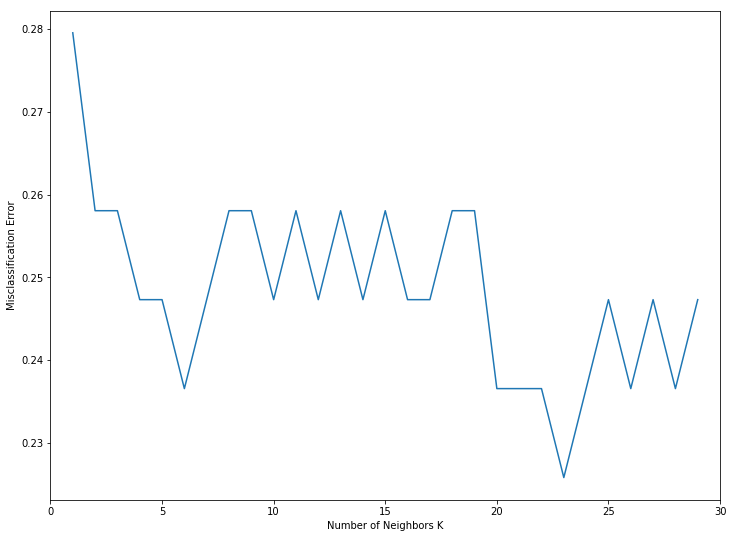

In [34]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(0,30)
plt.plot(k_neighbours,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [35]:
from sklearn.metrics import confusion_matrix
NNH = KNeighborsClassifier(n_neighbors= 23,weights='uniform',metric='euclidean')
NNH.fit(X_train, y_train)
y_pred=NNH.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

0.7741935483870968
[[10  7  1]
 [ 5 16  3]
 [ 0  5 46]]
